In [34]:
import numpy as np
import random as r
import math
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

print(scipy.stats.norm.ppf(0.95))
print(scipy.stats.norm.cdf(1.6448536269514722))
print(1-scipy.stats.norm.cdf(4/np.sqrt(8.973)))
print(1-scipy.stats.norm.cdf(5/np.sqrt(8.973)))
print(scipy.stats.norm.cdf(1.6448536269514722))



1.6448536269514722
0.95
0.09088289884527101
0.04754161845069549
0.95


 16%|█▌        | 159/1000 [00:00<00:01, 747.02it/s]

u= 3481788.3699523564


100%|██████████| 1000/1000 [00:01<00:00, 843.22it/s]


q примерно равно 0.2986666666666667
вероятность разорения= 7.199999999999999%


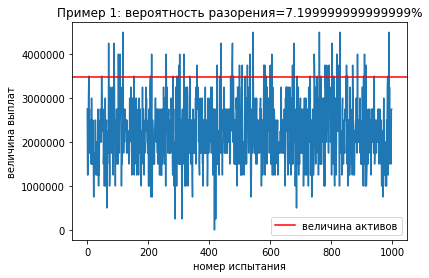

In [121]:
import numpy as np
import random as r
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

N=3000
q=0.3/100
b=250000
h=0
u=b*(N*q + np.sqrt(N*q*(1-q))*scipy.stats.norm.ppf(0.95))
print('u=',u)

k=1000
mas=[]
cnt=0
for i in tqdm(range(k)):
    people = np.array([int(r.random() < q) for i in range(N)])
    mas.append(b*people.sum() )
    cnt=cnt+int(b*people.sum() > u)
    h=h+people[people==1].sum()
print(f'q примерно равно {h/k/N*100}')
print(f'вероятность разорения= {cnt/k*100}%')

plt.plot(np.arange(k)[0:-1:1],mas[0:-1:1])
plt.axhline(u,c='r',label='величина активов')
plt.xlabel('номер испытания')
plt.ylabel('величина выплат')
plt.title(f'Пример 1: вероятность разорения={cnt/k*100}%')
plt.legend()
#plt.show()
plt.savefig('Primer.png', format='png', dpi=100)

2033.5880193811252 1355.7253462540834
q примерно равно 0.0005013 0.0005013
q1 примерно равно 0.0039985 0.0039985
q2 примерно равно 0.0020204999999999997 0.0020204999999999997
вероятность разорения равна 5.5%


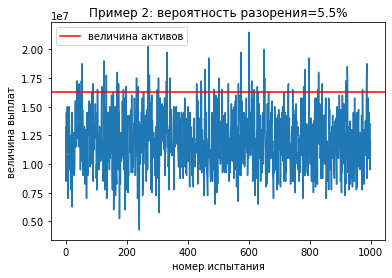

In [62]:
N=1000
mas=[]

h=0
h1=0
h2=0

g=0
g1=0
g2=0

N1=4000
N2=6000
b1=1000000
b2=250000
q=0.0005
q1=0.004
q2=0.002

         
m1=b1*q + b2*q1
s1= np.sqrt(b1**2*q + b2**2*q1 - m1**2)
m2=b1*q + b2*q2
s2= np.sqrt(b1**2*q + b2**2*q2 - m2**2)
ES= N1*m1 + N2*m2
sigmaS=np.sqrt(N1*s1**2 + N2*s2**2)
l=sigmaS*scipy.stats.norm.ppf(0.95)

teta=l/ES
pi1=m1*(1+teta)
pi2=m2*(1+teta)
print(pi1,pi2)



cnt=0
for i in range(N):
    people1 = np.zeros(N1)
    for j in range(N1):
        a=r.random()
        if a < q:
            people1[j]=1
            h+=1
        elif q< a < q+q1:
            people1[j]=2
            h1+=1
            
    people2 = np.zeros(N2)
    for j in range(N2):
        a=r.random()
        if a < q:
            people2[j]=1
            h+=1
        elif q < a < q+q2:
            people2[j]=2
            h2+=1

            
    people=np.hstack((people1,people2))
    v=b1*people[people==1].sum() + b2*people[people==2].sum()/2
    mas.append(v)
    cnt=cnt+int(v > ES+l)
    
    g=g+people1[people1==1].sum() + people2[people2==1].sum()
    g1=g1+people1[people1==2].sum()/2
    g2=g2+people2[people2==2].sum()/2
    
    if g2!=h2:
        print('i=',i)
        print(people1)
        print(people2)
        break
        

print(f'q примерно равно {h/N/(N1+N2)} {g/N/(N1+N2)}')
print(f'q1 примерно равно {h1/N/(N1)} {g1/N/(N1)}')
print(f'q2 примерно равно {h2/N/(N2)} {g2/N/(N2)}')



print(f'вероятность разорения равна {cnt/N*100}%')
plt.plot(np.arange(N)[0:-1:1],mas[0:-1:1])
plt.axhline(ES+l,c='r',label='величина активов')
plt.xlabel('номер испытания')
plt.ylabel('величина выплат')
plt.title(f'Пример 2: вероятность разорения={cnt/N*100}%')
plt.legend()
plt.savefig('Primer2_pic.png', format='png', dpi=100)

In [54]:
m1=1*0.004+4*0.0005
s1=0.004+16*0.0005- m1**2
print(scipy.stats.norm.ppf(0.95)*np.sqrt(4000*0.011964+6000*0.009964)/48)
print(1.3555272257451179*0.006*250000)
k=17.06530683576566/107.64
print(250000*(0.004+k*s2**2/250000/250000)/m2)
print(np.sqrt(s1),s2)
print(17.06530683576566/(4000*0.1095+6000*0.1))
print(17.06530683576566/(4000*0.10938+6000*0.1))
print(0.10938007131100254*0.016448)
print(0.00779908341292337*250000)

0.3555272257451179
2033.2908386176766
1.3957172599597836
0.10938007131100254 24979.991993593594
0.016440565352375397
0.01644817144321619
0.00179908341292337
1949.7708532308425


In [60]:
N1=4000
N2=6000
b1=1000000
b2=250000
q=0.0005
q1=0.004
q2=0.002

         
m1=b1*q + b2*q1
s1= np.sqrt(b1**2*q + b2**2*q1 - m1**2)
m2=b1*q + b2*q2
s2= np.sqrt(b1**2*q + b2**2*q2 - m2**2)
ES= N1*m1 + N2*m2
sigmaS=np.sqrt(N1*s1**2 + N2*s2**2)
l=sigmaS*scipy.stats.norm.ppf(0.95)

k=l/(N1*s1+N2*s2)
pi1=m1+k*s1
pi2=m2+k*s2
print(pi1,pi2)
print(k*s2/m2)

1950.2344393392668 1411.2943996153224
0.4112943996153223


100%|██████████| 150/150 [00:37<00:00,  3.64it/s]


q примерно равно 0.0033420000000000004 0.0004940000000000001
q1 примерно равно 0.026656666666666665 0.004235
q2 примерно равно 0.01347 0.001971111111111111
вероятность разорения равна 5.333333333333334%


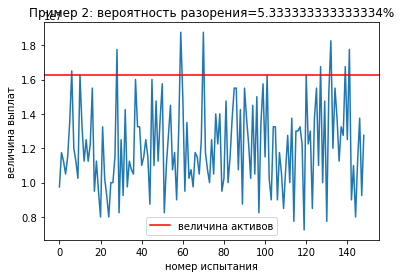

In [80]:
N=150
mas=[]
g=0
g1=0
g2=0
N1=4000
N2=6000
b1=1000000
b2=250000
q=0.0005
q1=0.004
q2=0.002
cnt=0
for i in tqdm(range(N)):
    people1 = np.array([np.random.choice([1,2,0],p=[q,q1,1-q-q1],replace=True) for i in range(N1)])
    people2 = np.array([np.random.choice([1,2,0],p=[q,q2,1-q-q2],replace=True) for i in range(N2)])
    #print(people[people==1].sum() )
    people=np.hstack((people1,people2))
    v=b1*people[people==1].sum() + b2*people[people==2].sum()/2
    mas.append(v)
    cnt=cnt+int(v > ES+l)
    g=g+people1[people1==1].sum() + people2[people2==1].sum()
    g1=g1+people1[people1==2].sum()/2
    g2=g2+people2[people2==2].sum()/2
    
print(f'q примерно равно {h/N/(N1+N2)} {g/N/(N1+N2)}')
print(f'q1 примерно равно {h1/N/(N1)} {g1/N/(N1)}')
print(f'q2 примерно равно {h2/N/(N2)} {g2/N/(N2)}')
print(f'вероятность разорения равна {cnt/N*100}%')
plt.plot(np.arange(N)[0:-1:1],mas[0:-1:1])
plt.axhline(ES+l,c='r',label='величина активов')
plt.xlabel('номер испытания')
plt.ylabel('величина выплат')
plt.title(f'Пример 2: вероятность разорения={cnt/N*100}%')
plt.legend()
plt.savefig('Primer2_pic.png', format='png', dpi=100)

100%|██████████| 10000/10000 [00:10<00:00, 913.57it/s]


VaR(true)= 13.927153479809427
VaR(emperic)= 14.0


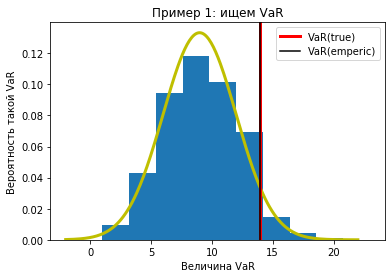

In [130]:
import numpy as np
import random as r
import math
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

k=10000
N=3000
q=0.3/100
mu=9
sigma=np.sqrt(8.973)
#u=b*(N*q + np.sqrt(N*q*(1-q))*scipy.stats.norm.ppf(0.95))
u=b*14

mas=[]
cnt=0
for i in tqdm(range(k)):
    people = np.array([int(r.random() < q) for i in range(N)])
    mas.append(b*people.sum() )
    

mas1=np.linspace(-2, 22,256,endpoint=True)
mas2=1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (mas1 - mu)**2 / (2 * sigma**2) )

print('VaR(true)=',mu+sigma*scipy.stats.norm.ppf(0.95))
print('VaR(emperic)=',np.quantile(mas,0.95))

plt.hist(mas,density=True)
plt.plot(mas1,mas2,linewidth=3, color='y')
plt.axvline(mu+sigma*scipy.stats.norm.ppf(0.95),c='r',linewidth=3,label='VaR(true)')
plt.axvline(np.quantile(mas,0.95),c='black',label='VaR(emperic)')
plt.xlabel('Величина VaR')
plt.ylabel('Вероятность такой VaR')
plt.title(f'Пример 1: ищем VaR')
plt.legend()
plt.show()

#plt.savefig('Primer.png', format='png', dpi=100)

  1%|          | 72/10000 [00:00<00:13, 719.27it/s]

u= 3500000


100%|██████████| 10000/10000 [00:11<00:00, 882.74it/s]


вероятность разорения= 4.08%


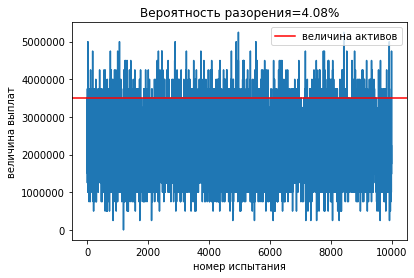

In [135]:
import numpy as np
import random as r
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

k=10000
N=3000
q=0.3/100
b=250000
h=0
#u=b*(N*q + np.sqrt(N*q*(1-q))*scipy.stats.norm.ppf(0.95))
u=b*14
print('u=',u)

mas=[]
cnt=0
for i in tqdm(range(k)):
    people = np.array([int(r.random() < q) for i in range(N)])
    mas.append(b*people.sum() )
    cnt=cnt+int(b*people.sum() > u)
    h=h+people[people==1].sum()
#print(f'q примерно равно {h/k/N*100}%')
print(f'вероятность разорения= {cnt/k*100}%')
#print(np.quantile(mas,0.95))

plt.plot(np.arange(k)[0:-1:1],mas[0:-1:1])
plt.axhline(u,c='r',label='величина активов')
plt.xlabel('номер испытания')
plt.ylabel('величина выплат')
plt.title(f'Вероятность разорения={cnt/k*100}%')
plt.legend()
plt.show()

#plt.savefig('Primer.png', format='png', dpi=100)

gaus13: 0.09088289884527101
gaus14: 0.04754161845069549
bin: 0.04122333067471784
pois: 0.04146632547290363
moavr-laplas: 0.03393066674057965


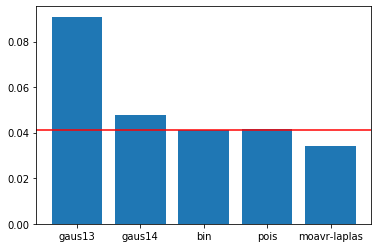

In [180]:
N=3000
p=0.003

def c_k_n(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
def bin(N,n,p):
    otv=0
    for i in range(n+1):
        otv=otv + c_k_n(N,i)*p**i*(1-p)**(N-i)
    return otv

def pois(N,n,p):
    lambd=N*p
    otv=0
    for i in range(n+1):
        otv=otv + np.exp(-lambd)*lambd**i/math.factorial(i)
    return otv

x_beta=(14+0.5-N*p)/np.sqrt(N*p*(1-p))
x_alfa=(0-0.5-N*p)/np.sqrt(N*p*(1-p))

print('gaus13:',1-scipy.stats.norm.cdf(4/np.sqrt(8.973)))
print('gaus14:', 1-scipy.stats.norm.cdf(5/np.sqrt(8.973)))
print('bin:',1-bin(3000,14,0.003))
print('pois:',1-pois(3000,14,0.003))
print('moavr-laplas:',1-(scipy.stats.norm.cdf(x_beta)-scipy.stats.norm.cdf(x_alfa)))

mas1=np.array([1-scipy.stats.norm.cdf(4/np.sqrt(8.973)),
      1-scipy.stats.norm.cdf(5/np.sqrt(8.973)),
      1-bin(3000,14,0.003),1-pois(3000,14,0.003),
      1-(scipy.stats.norm.cdf(x_beta)-scipy.stats.norm.cdf(x_alfa))])
mas2=['gaus13','gaus14','bin','pois','moavr-laplas']

plt.bar(mas2,mas1)
plt.axhline(0.041,c='r',label='эмпирическая величина разорения')
plt.show()



q примерно равно  0.000505
q1 примерно равно  0.00399775
q2 примерно равно  0.0019913333333333332
вероятность разорения равна 4.8%
18.0


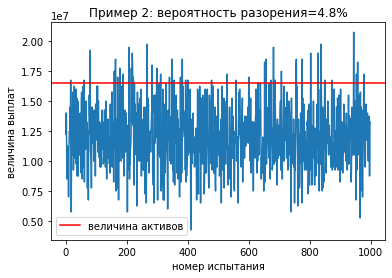

In [173]:
N=1000
mas=[]
g=0
g1=0
g2=0
N1=4000
N2=6000
b1=1000000
b2=250000
q=0.0005
q1=0.004
q2=0.002
cnt=0
for i in range(N):
    people1 = np.array([np.random.choice([1,2,0],p=[q,q1,1-q-q1],replace=True) for i in range(N1)])
    people2 = np.array([np.random.choice([1,2,0],p=[q,q2,1-q-q2],replace=True) for i in range(N2)])
    #print(people[people==1].sum() )
    people=np.hstack((people1,people2))
    v=b1*people[people==1].sum() + b2*people[people==2].sum()/2
    mas.append(v)
    cnt=cnt+int(v > (48+18)*b2)
    g=g+people1[people1==1].sum() + people2[people2==1].sum()
    g1=g1+people1[people1==2].sum()/2
    g2=g2+people2[people2==2].sum()/2   
print(f'q примерно равно  {g/N/(N1+N2)}')
print(f'q1 примерно равно  {g1/N/(N1)}')
print(f'q2 примерно равно  {g2/N/(N2)}')
print(f'вероятность разорения равна {cnt/N*100}%')
print(np.quantile(mas,0.95)/b2-48)
plt.plot(np.arange(N)[0:-1:1],mas[0:-1:1])
plt.axhline((48+18)*b2,c='r',label='величина активов')
plt.xlabel('номер испытания')
plt.ylabel('величина выплат')
plt.title(f'Пример 2: вероятность разорения={cnt/N*100}%')
plt.legend()
plt.show()
#plt.savefig('Primer5_pic.png', format='png', dpi=100)

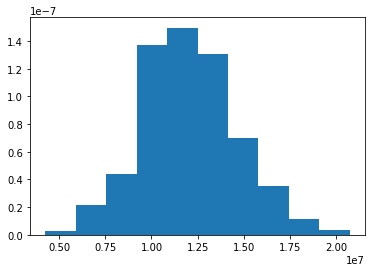

In [176]:
plt.hist(mas,density=True)
plt.show()